# Strings in Python

Strings are a bit tricky, and you have to be careful with the following points

## Strings and Methods

In [1]:
txt = 'hello, world'

is a standard text string. Parts of the string can be accessed with the common *slicing* syntax

In [3]:
txt[:5]

'hello'

Text strings are also Python objects, and as such have a number of *methods* available. Examples are

In [4]:
txt.startswith('hello')

True

In [5]:
txt.upper()

'HELLO, WORLD'

In [6]:
txt.endswith('world')

True

In [7]:
txt.endswith('World')

False

In [9]:
txt.replace('world', 'thomas')

'hello, thomas'

## Formatted strings
One of the features I just love about Python are *formatted strings*. They work by simply putting an `f` before your string, and allow you to include existing variables into your string. For example:

In [1]:
import numpy as np
var_name = 'pi'
value = np.pi
info_text = f'The value of {var_name} is {value}'
info_text

'The value of pi is 3.141592653589793'

And even better: you can include formatting commands into the string:

In [4]:
info_text = f'The value of {var_name:10s} is {value:5.2f}'
info_text

'The value of pi         is  3.14'

## Pathnames
Pathnames are tricky, because *Windows* and *Unix* use different path-separators.

    * Windows: 'C:\Users\gebhard'
    * Unix: '~/users/gebhard'
 And the problem is more tricky by the fact that slash-backs in strings indicate special characters. For example '\t' indicates a tab!

What can be done?

### Raw strings
A "r" at the beginning of a string indicates a *raw* string. This means that "\" is interpreted literally. Otherwise, you have to "escape" the "\" with another "\"

In [77]:
r'C:\Users\gebhard'

'C:\\Users\\gebhard'

In [78]:
'C:\\Users\\gebhard'

'C:\\Users\\gebhard'

In [79]:
print('C:\\Users\\gebhard')

C:\Users\gebhard


But the simplest way is to simply use the Unix-format. In my exprience, this is also handled nicely under Windows:

In [80]:
'C:/Users/gebhard'

'C:/Users/gebhard'

### For Pythonistas: pathlib
OK, path names can be handled as text-strings. In that case you need to use the package `os` for working with files and folders:

In [82]:
import os
os.curdir

'.'

In [85]:
starting_dir = os.path.abspath(os.curdir)
starting_dir

'C:\\Users\\thomas'

In [86]:
dir_name = 'data'
file_name = 'test.txt'
os.path.join(dir_name, file_name)

'data\\test.txt'

In [88]:
os.path.abspath('..') # one level up

'C:\\Users'

But the more elegant way is to use the package `pathlib`

In [89]:
from pathlib import Path
Path.home()

WindowsPath('C:/Users/thomas')

In [94]:
home = Path()  # current directory
home

WindowsPath('.')

Here a few examples of how to use such `Path` objects:

In [95]:
home_absolute = home.absolute()
home_absolute

WindowsPath('C:/Users/thomas')

In [102]:
home.is_dir()

True

In [104]:
data_dir = Path('data')
new_file = data_dir/'test.py'  # joining a directory and a file
new_file

WindowsPath('data/test.py')

In [105]:
new_file.stem

'test'

In [106]:
new_file.suffix

'.py'

In [107]:
new_file.parent

WindowsPath('data')

In [108]:
new_file.exists()

False

**Warning**: changing directory has to be done with `os.chdir`:

In [111]:
os.chdir('C:/Users/thomas/Coding')
Path().absolute()

WindowsPath('C:/Users/thomas/Coding')

In [112]:
# or:
os.chdir(starting_dir)
Path().absolute()

WindowsPath('C:/Users/thomas')

## TeX-strings in plots

Sometimes we want to use fancy strings in plots, such as sub-script and superscript. This can be achieved with the TeX-syntax

Text(0, 0.5, '... or with $\\bf{bold}$ text')

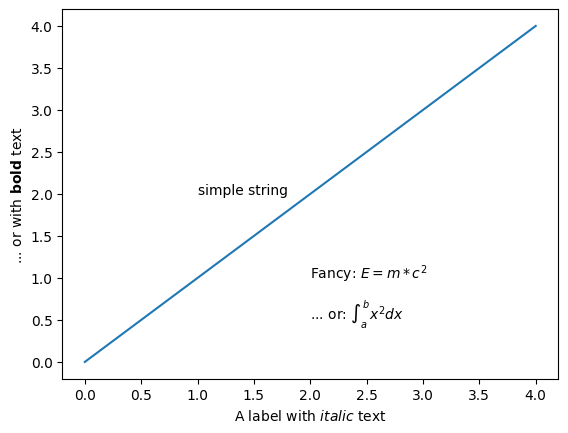

In [126]:
plt.plot(np.arange(5))
plt.text(1, 2, 'simple string')
plt.text(2, 1, 'Fancy: $E = m*c^2$')                   # TeX is indicated with $...$ in the string
plt.text(2, 0.5, r'... or: $\int_a^b x^2 dx$')
plt.xlabel('A label with $\\it{italic}$ text')  # note the \\
plt.ylabel(r'... or with $\bf{bold}$ text')    # note the raw-string!